# Handling Missing values

In [57]:
import pandas as pd

In [ ]:
df=pd.read_csv(" ") # path to test.csv from titanic_dataset

In [61]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [65]:
(df.isnull().sum()/len(df) )*100  #missing values percentage calculation

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

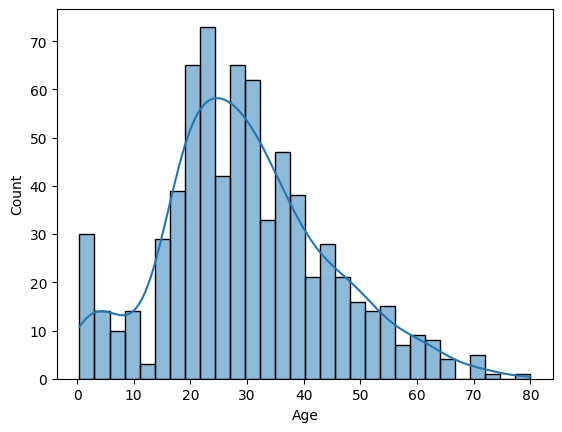

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Age'], bins=30, kde=True) #KDE=Kernel Density Estimate ( the blue line drawn over bars)
plt.show()


In [69]:
#Median imputation for 'Age' ( Since mean is sensitive for outliers so we are going to use median imputation)
print(df['Age'].median())
df['Age']=df['Age'].fillna(df['Age'].median())

28.0


In [71]:
print(df['Age'].isnull().sum()) #null values are replaced with median

0


**Cabin should be droped since it consists of nearly 77% of missing values...**

In [73]:
df.drop('Cabin', axis=1, inplace=True)  #axis1-refers to column and axis0-refers to rows

In [77]:
print(df.columns) #check columns after dropping cabin

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [62]:
df['Embarked'].mode()[0] #since multiple mode values might exsits. so we only go with first one, hence we used mode[0]

'S'

In [92]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0]) #fill with mode value

In [96]:
print(df['Embarked'].isna().sum())

0


# Handling Imbalanced data

# Upsampling minority class
Advantage: Dataset becomes balanced, so models won’t be biased toward majority class.<br>
Diadvantage: Since we use with replacement, so duplication of minority samples doesnt add new info.The model may learn only patterns from repeated samples instead of learning generalized patterns.

In [99]:
n_class_0=900 #majority class
n_class_1=100 #minority class

In [101]:
import numpy as np
class_0=pd.DataFrame({
    'feature1':np.random.normal(loc=0,scale=1,size=n_class_0),  # loc refers to mean, and scale refers to standard deviation
    'target':[0]*n_class_0})     #so for standard normal distribution we took loc=0,scale=1, and size refers to number of dataPoints to generate

class_1=pd.DataFrame({
    'feature1':np.random.normal(loc=3,scale=1,size=n_class_1),   
    'target':[1]*n_class_1}) 
    

In [103]:
class_0

,feature1,target
0,-1.776504,0
1,0.356703,0
2,-0.025222,0
3,0.951288,0
4,1.287430,0
...,...,...
895,-1.332681,0
896,-1.082979,0
897,1.070563,0
898,-0.969212,0


In [105]:
class_1

,feature1,target
0,-0.472995,1
1,0.161775,1
2,0.814506,1
3,0.445112,1
4,0.262509,1
...,...,...
95,-0.202309,1
96,-0.499936,1
97,-0.765325,1
98,-1.508683,1


In [119]:
df = pd.concat([class_0, class_1],ignore_index=True) #after concatenation the resulting dataframe will have duplicate indices so we used ignore_index=True
df

,feature1,target
0,-1.776504,0
1,0.356703,0
2,-0.025222,0
3,0.951288,0
4,1.287430,0
...,...,...
995,-0.202309,1
996,-0.499936,1
997,-0.765325,1
998,-1.508683,1


In [125]:
print(df['target'].value_counts())  #counts how many times each unique value appears in the column target

target
0    900
1    100
Name: count, dtype: int64


In [130]:
#Separate majority and minority classes
df_majority = df[df['target'] == 0]
df_minority = df[df['target'] == 1]

In [132]:
df_majority

,feature1,target
0,-1.776504,0
1,0.356703,0
2,-0.025222,0
3,0.951288,0
4,1.287430,0
...,...,...
895,-1.332681,0
896,-1.082979,0
897,1.070563,0
898,-0.969212,0


In [113]:
import pandas as pd
from sklearn.utils import resample

In [147]:
df_UpSampled_minority=resample(df_minority,
         replace=True, #sample with replacement
         n_samples=len(df_majority), #no.of datapoints(match the majority class datapoints)
         random_state=42)  #reproducibility

df_UpSampled_minority.shape   #we have created new datapoints for minority class

(900, 2)

In [151]:
df_UpSampled=pd.concat([df_UpSampled_minority,df_majority],ignore_index=True)
print(df_UpSampled)

      feature1  target
0     1.008620       1
1     1.551717       1
2     1.162481       1
3    -0.041700       1
4    -0.288577       1
...        ...     ...
1795 -1.332681       0
1796 -1.082979       0
1797  1.070563       0
1798 -0.969212       0
1799  1.181014       0

[1800 rows x 2 columns]


In [155]:
print(df_UpSampled['target'].value_counts())

target
1    900
0    900
Name: count, dtype: int64


# DownSampling majority class
Advantage: Dataset becomes balanced, so models won’t be biased toward majority class.<br>
Disadvantage: We might loose important information since we drop lot of majority class samples.

In [103]:
n_class_0=900 #majority class
n_class_1=100 #minority class

In [105]:
import numpy as np
class_0=pd.DataFrame({
    'feature1':np.random.normal(loc=0,scale=1,size=n_class_0),  # loc refers to mean, and scale refers to standard deviation
    'target':[0]*n_class_0})     #so for standard normal distribution we took loc=0,scale=1, and size refers to number of dataPoints to generate

class_1=pd.DataFrame({
    'feature1':np.random.normal(loc=3,scale=1,size=n_class_1),   
    'target':[1]*n_class_1}) 
    

In [107]:
df = pd.concat([class_0, class_1],ignore_index=True) #after concatenation the resulting dataframe will have duplicate indices so we used ignore_index=True

In [109]:
#Separate majority and minority classes
df_majority = df[df['target'] == 0]
df_minority = df[df['target'] == 1]

In [ ]:
df_downSampled_majority=resample(df_majority,
         replace=False, # since we are just reducing data points , no need of replacement
         n_samples=len(df_minority), #no.of datapoints(match the majority class datapoints)
         random_state=42)  #reproducibility

df_downSampled_majority.shape   #we have created new datapoints for minority class

In [120]:
df_downSampled=pd.concat([df_downSampled_majority,df_minority],ignore_index=True)
print(df_downSampled)

     feature1  target
0   -0.931874       0
1   -0.192909       0
2   -0.466623       0
3    0.062384       0
4   -0.867215       0
..        ...     ...
195  1.318809       1
196  2.377487       1
197  2.056399       1
198  4.587653       1
199  2.534717       1

[200 rows x 2 columns]


In [122]:
print(df_downSampled['target'].value_counts())

target
0    100
1    100
Name: count, dtype: int64


# SMOTE-Synthetic Minority Oversampling Technique
It is a technique used to handle imbalanced datasets by creating synthetic (artificial) samples of the minority class instead of just duplicating existing ones (like plain upsampling).<br>
For each minority sample, SMOTE picks one of its nearest neighbors (from the same minority class).
It then creates a new synthetic sample by interpolating between the original sample and its neighbor

In [6]:
from sklearn.datasets import make_classification
import pandas as pd


In [45]:
# Creating imbalanced dataset using make_classification function

X,Y= make_classification(n_samples=1000,       # total samples
                           n_features=2,       # number of features
                           n_redundant=0,      # redundant features
                           n_classes=2,        # binary classification
                           weights=[0.9, 0.1], # imbalance ratio (90% : 10%)
                           random_state=42)

X --> input variable with two columns(features) and 1000 rows(samples) <br>
Y --> output variable (target) which contains class labels( 0 and 1) since n_classes=2, and distribution depends on weights [0.9,0.1] <br>
      900 samples labeled as 0 <br>
      100 samples labeled as 1

In [119]:
len(Y)

1000

In [117]:
len(X)


1000

In [51]:
df=pd.DataFrame(X,columns=['f1','f2'])
df['target']=Y

In [61]:
df['target'].value_counts()

target
0    894
1    106
Name: count, dtype: int64

**since class-0 has 894 samples and class-1 has 106 samples which is imbalanced distribution**

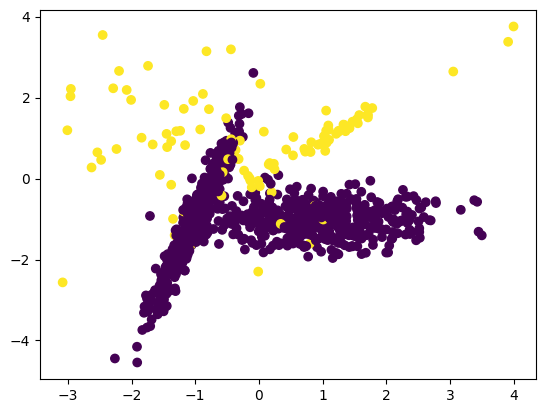

In [80]:
import matplotlib.pyplot  as plt
plt.scatter(x=df['f1'],y=df['f2'],c=df['target'])  #f1 on x-axis,f2 on y-axis and c means color points based on target ( i.e class 0- one color, class-1 other color)

**Applying SMOTE to handle imbalance**

In [83]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [85]:
from imblearn.over_sampling import SMOTE

In [87]:
# Create SMOTE object
smote = SMOTE()

In [89]:
X_resampled, Y_resampled = smote.fit_resample(X, Y)

In [101]:
df_resampled=pd.DataFrame(X_resampled,columns=['f1','f2'])
df_resampled['target']=Y_resampled

In [103]:
df_resampled

,f1,f2,target
0,-0.058619,-0.351090,0
1,1.246686,1.153597,1
2,0.962777,0.859397,1
3,-2.957441,2.033645,1
4,0.871229,-1.205785,0
...,...,...,...
1783,1.065348,1.177956,1
1784,-1.537228,0.066083,1
1785,1.037831,1.085238,1
1786,0.981236,0.874907,1


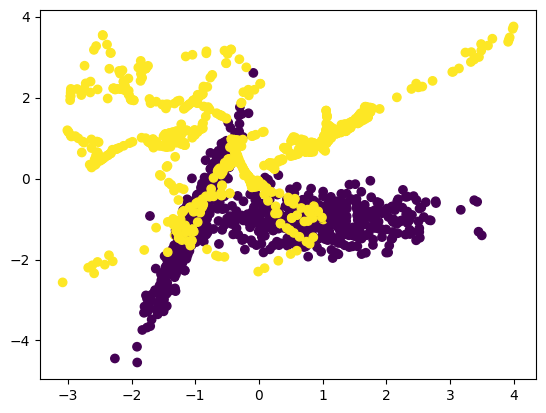

In [105]:
import matplotlib.pyplot  as plt
plt.scatter(x=df_resampled['f1'],y=df_resampled['f2'],c=df_resampled['target'])  #f1 on x-axis,f2 on y-axis and c means color points based on target ( i.e class 0- one color, class-1 other color)

In [115]:
df_resampled['target'].value_counts()

target
0    894
1    894
Name: count, dtype: int64

**SMOTE generated 788 synthetic points for class 1 (so that it matches 894).<br>
These points are not random noise, but created by interpolating between existing minority class samples.**